## Bayes' Theorem
Bayes' theorem is stated mathematically as the following equation:
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
- B is termed as evidence
- P(A) is the priori of A(i.e., probability of event A before evidence is seen). The evidence is an attribute value of an unknown instance.
- P(A|B) is a posteriori probability of A(i.e., probability of event after evidence is seen)
## Dataset
|      | OUTLOOK  | TEMPERATURE | HUMIDITY | WINDY | PLAY GOLF |
| :--: | :------: | :---------: | :------: | :---: | --------- |
|  0   |  Rainy   |     Hot     |   High   | False | No        |
|  1   |  Rainy   |     Hot     |   High   | True  | No        |
|  2   | Overcast |     Hot     |   High   | False | Yes       |
|  3   |  Sunny   |    Mild     |   High   | False | Yes       |
|  4   |  Sunny   |    Cool     |  Normal  | False | Yes       |
|  5   |  Sunny   |    Cool     |  Normal  | True  | No        |
|  6   | Overcast |    Cool     |  Normal  | True  | Yes       |
|  7   |  Rainy   |    Mild     |   High   | False | No        |
|  8   |  Rainy   |    Cool     |  Normal  | False | Yes       |
|  9   |  Sunny   |    Mild     |  Normal  | False | Yes       |
|  10  |  Rainy   |    Mild     |  Normal  | True  | Yes       |
|  11  | Overcast |    Mild     |   High   | True  | Yes       |
|  12  | Overcast |     Hot     |  Normal  | False | Yes       |
|  13  |  Sunny   |    Mild     |   High   | True  | No        |
With regards to this dataset, we can apply Bayes' theorem in the following way:
$$P(y|X)=\frac{P(X|y)P(y)}{P(X)}$$
- $y$:class variable
- $X$:feature vector


Based on the given dataset,e.g.(refer 1st row of dataset),
- $X$=(Rainy, Hot, High, False)
- $y$= No

## Naive assumption
The features are all independent, therefore:
$$P(A,B)=P(A)P(B)$$
finally:
$$P(y|x_1,\cdots,x_n)=\frac{P(x_1,\cdots,x_n|y)P(y)}{P(x_1,\cdots,x_n)}=\frac{P(x_1|y)P(x_2|y)\cdots P(x_n|y)P(y)}{P(x_1)P(x_2)\cdots P(x_n)}$$
=>
$$P(y|x_1,\cdots x_n)=\frac{\prod_{i=1}^n P(x_i|y)P(y)}{\prod_{i=1}^n P(x_i)}$$
As the denominator remains constant for a given input, we can remove that term:
=>
$$P(y|x_1,\cdots x_n)\propto \prod_{i=1}^n P(x_i|y)P(y)$$
=>
$$\hat{y}=\operatorname*{argmax}_y \prod_{i=1}^n P(x_i|y)P(y)$$
 - $P(y)$ is also called class probability and $P(x_i | y)$ is called conditional probability
 - We need to find $P(x_i | y_j)$ for each $x_i$ in $X$ and $y_j$ in $y$


 **outlook**

 
| type     | total | yes  | no   | p(yes) | p(no) |
| -------- | ----- | ---- | ---- | ------ | ----- |
| Rainy    | 5     | 2    | 3    | 2/9    | 3/5   |
| Overcast | 4     | 4    | 0    | 4/9    | 0     |
| sunny    | 5     | 3    | 2    | 3/9    | 2/5   |
| -        | 14    | 9    | 5    | -      | -     |


**temperature**


| type | total | yes  | no   | p(yes) | p(no) |
| ---- | ----- | ---- | ---- | ------ | ----- |
| Hot  | 4     | 2    | 2    | 2/9    | 2/5   |
| Mild | 6     | 4    | 2    | 4/9    | 2/5   |
| Cool | 4     | 3    | 1    | 3/9    | 1/5   |
| -    | 14    | 9    | 5    | -      | -     |

**humidity**

| type   | total | yes  | no   | p(yes) | p(no) |
| ------ | ----- | ---- | ---- | ------ | ----- |
| High   | 7     | 3    | 4    | 3/9    | 4/5   |
| Normal | 7     | 6    | 1    | 6/9    | 1/5   |
| -      | 14    | 9    | 5    | -      | -     |

**windy**

| type  | total | yes  | no   | p(yes) | p(no) |
| ----- | ----- | ---- | ---- | ------ | ----- |
| False | 8     | 6    | 2    | 6/9    | 2/5   |
| True  | 6     | 3    | 3    | 3/9    | 3/5   |
| -     | 14    | 9    | 5    | -      | -     |

=>
- $P(y=yes)=9/14,p(y=no)=5/14$
- $P(outlook=Rainy|y=yes)=2/9....$


Let us test it on a new set of features (let us call it today):
```
today = (Sunny, Hot, Normal, False)
```
So, probability of playing golf is given by:
$$P(yes|today)\propto{P(outlook=sunny|y=yes)P(temperature=Hot|y=yes)P(humidity=Normal|y=yes)P(windy=False|y=yes)P(y=yes)}$$
=>
$$P(yes|today)\propto \frac{3}{9}\frac{2}{9}\frac{6}{9}\frac{6}{9}\frac{9}{14}=0.021$$
Similarly,
$$P(no|today)\propto \frac{2}{5}\frac{2}{5}\frac{1}{5}\frac{2}{5}\frac{5}{14}=0.0046$$
Since,
$$P(yes|today)+P(no|today)=1$$
=>
$$P(yes|today)=0.82,>\ P(no|today)=0.18$$
Therefore, prediction that golf would be played is "yes".

In [1]:
import mxnet as mx
from mxnet import nd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline
display.set_matplotlib_formats("svg")

In [2]:
# import mnist data using gluon
# define a transform that changes the image to a binary image
def transform(data, label):
    return (nd.floor(data/128).astype(np.float32), label.astype(np.float32))

In [3]:
mnistTrain = mx.gluon.data.vision.MNIST(root="./data", train=True, transform=transform)
mnistTest = mx.gluon.data.vision.MNIST(root="./data", train=False, transform=transform)

In [5]:
image0, label0 = mnistTrain[0]
print(image0.shape)
print(label0)

(28, 28, 1)
5.0


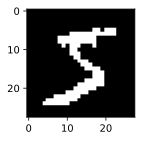

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(image0.squeeze().asnumpy(), cmap="gray")

In [14]:
images, labels = mnistTrain[0:20]
images.shape

(20, 28, 28, 1)

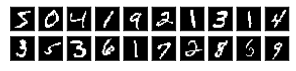

In [24]:
fig, ax = plt.subplots(2, 10, figsize=(5,1))
ax = ax.flatten()
for i in range(20):
    ax[i].imshow(images[i].squeeze().asnumpy(), cmap="gray")
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].axes.get_yaxis().set_visible(False)

- based on the naive bayes 


In [4]:
# initilize the counters
xCount = nd.zeros((784,10))
yCount = nd.zeros((10))

for data, label in mnistTrain:
    y = int(label)
    yCount[y] += 1
    xCount[:,y] += data.reshape((784))
